## Your task is to apply k-means on iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than three clusters that is still better at tracking the real trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
y = iris.target

X = iris.data
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

10.1 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


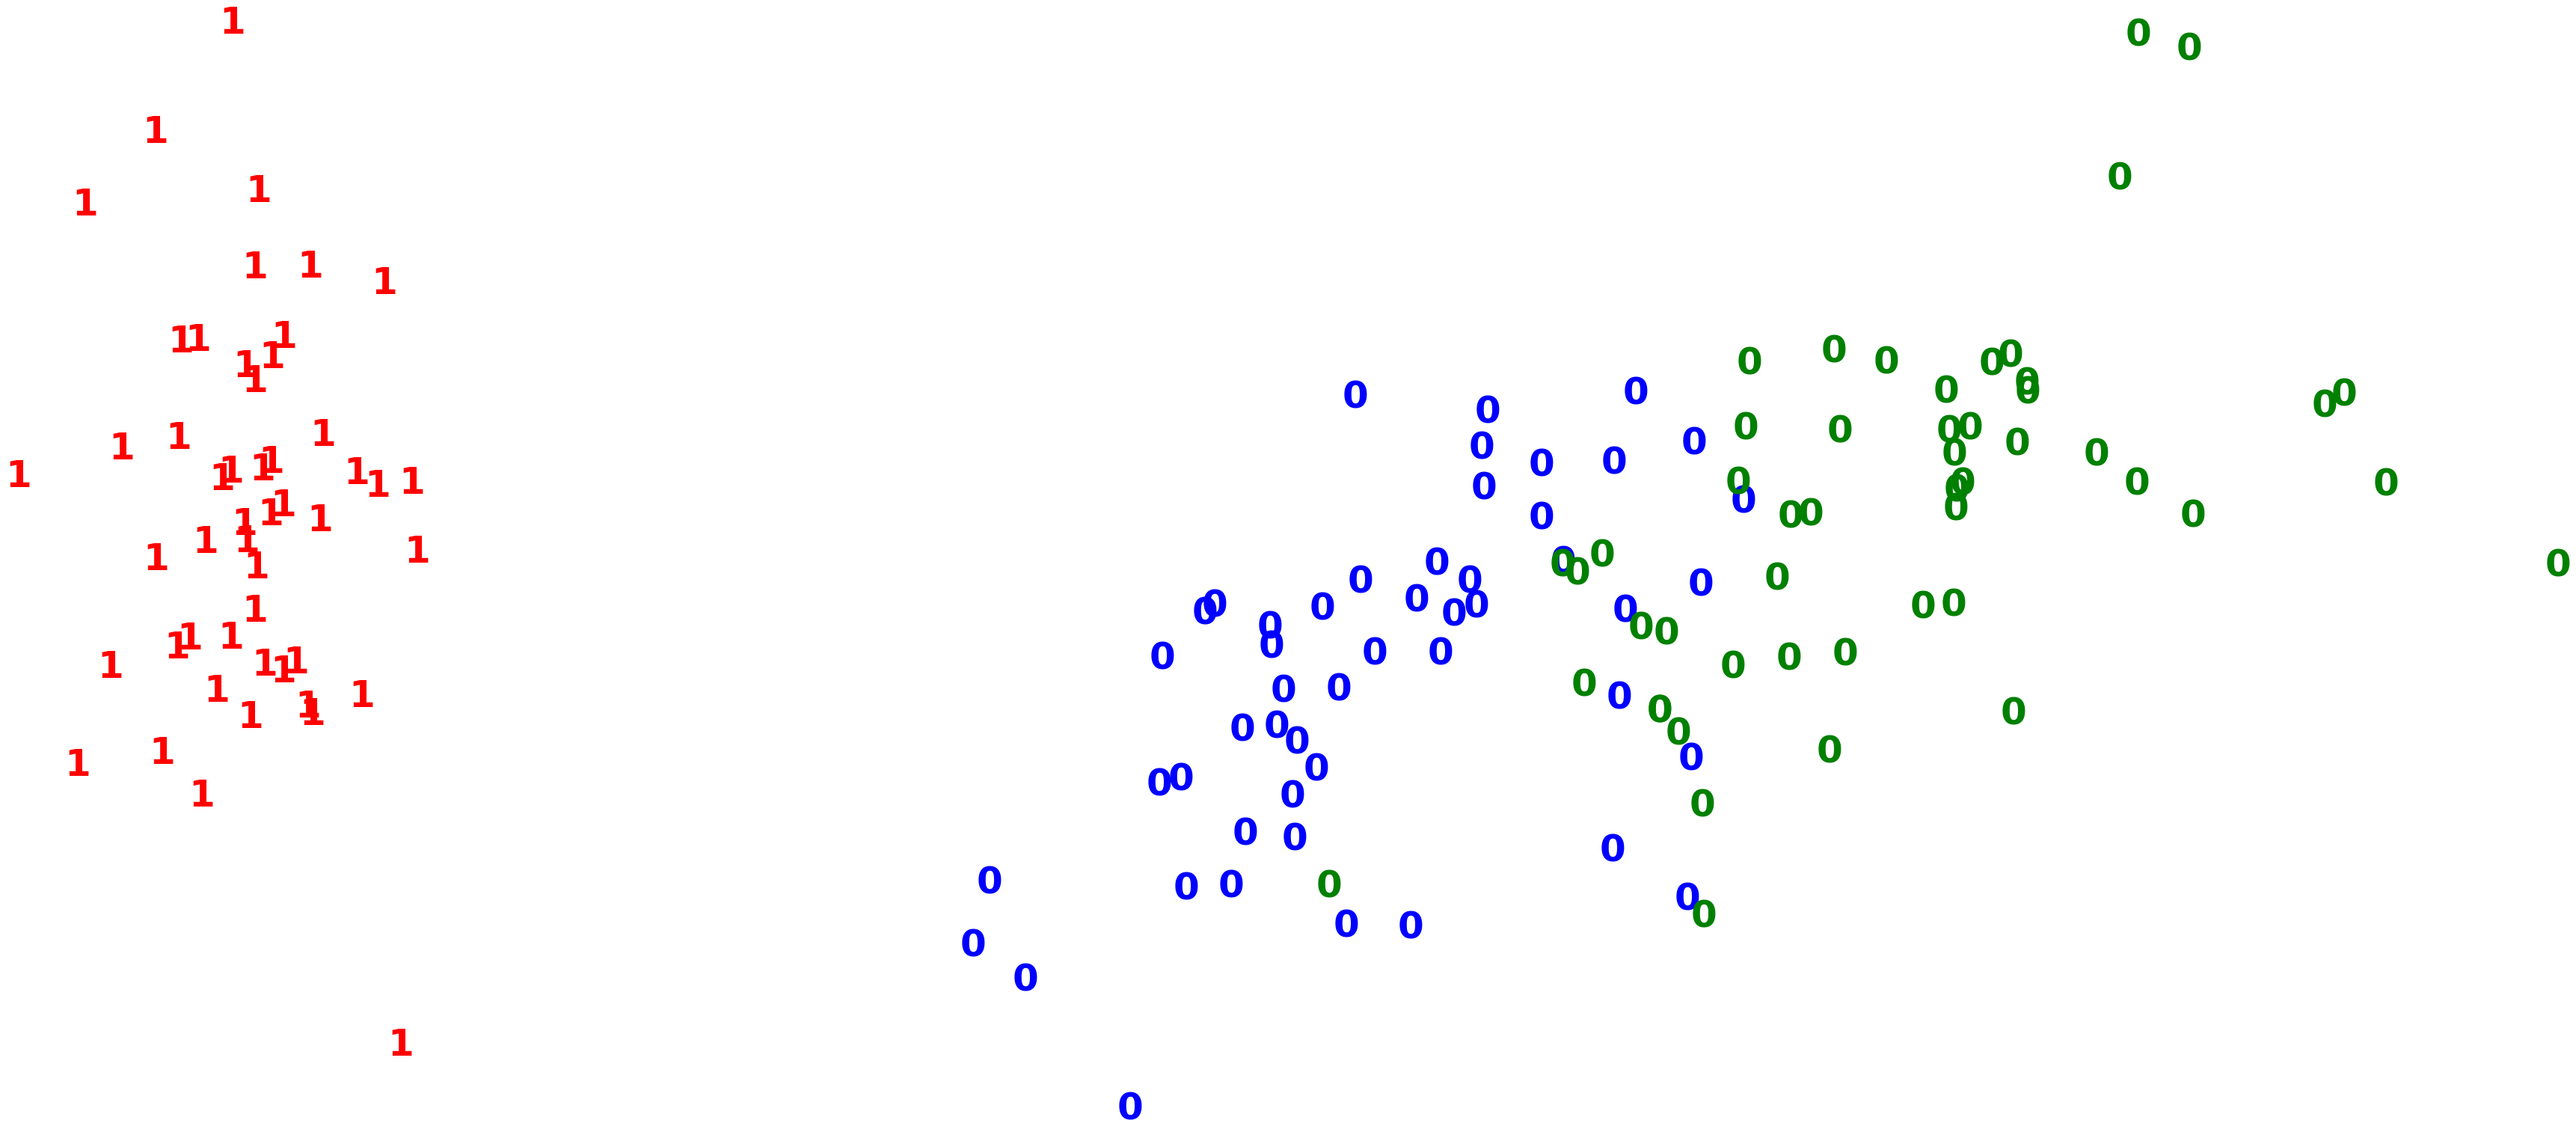

In [2]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

15.8 ms ± 820 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


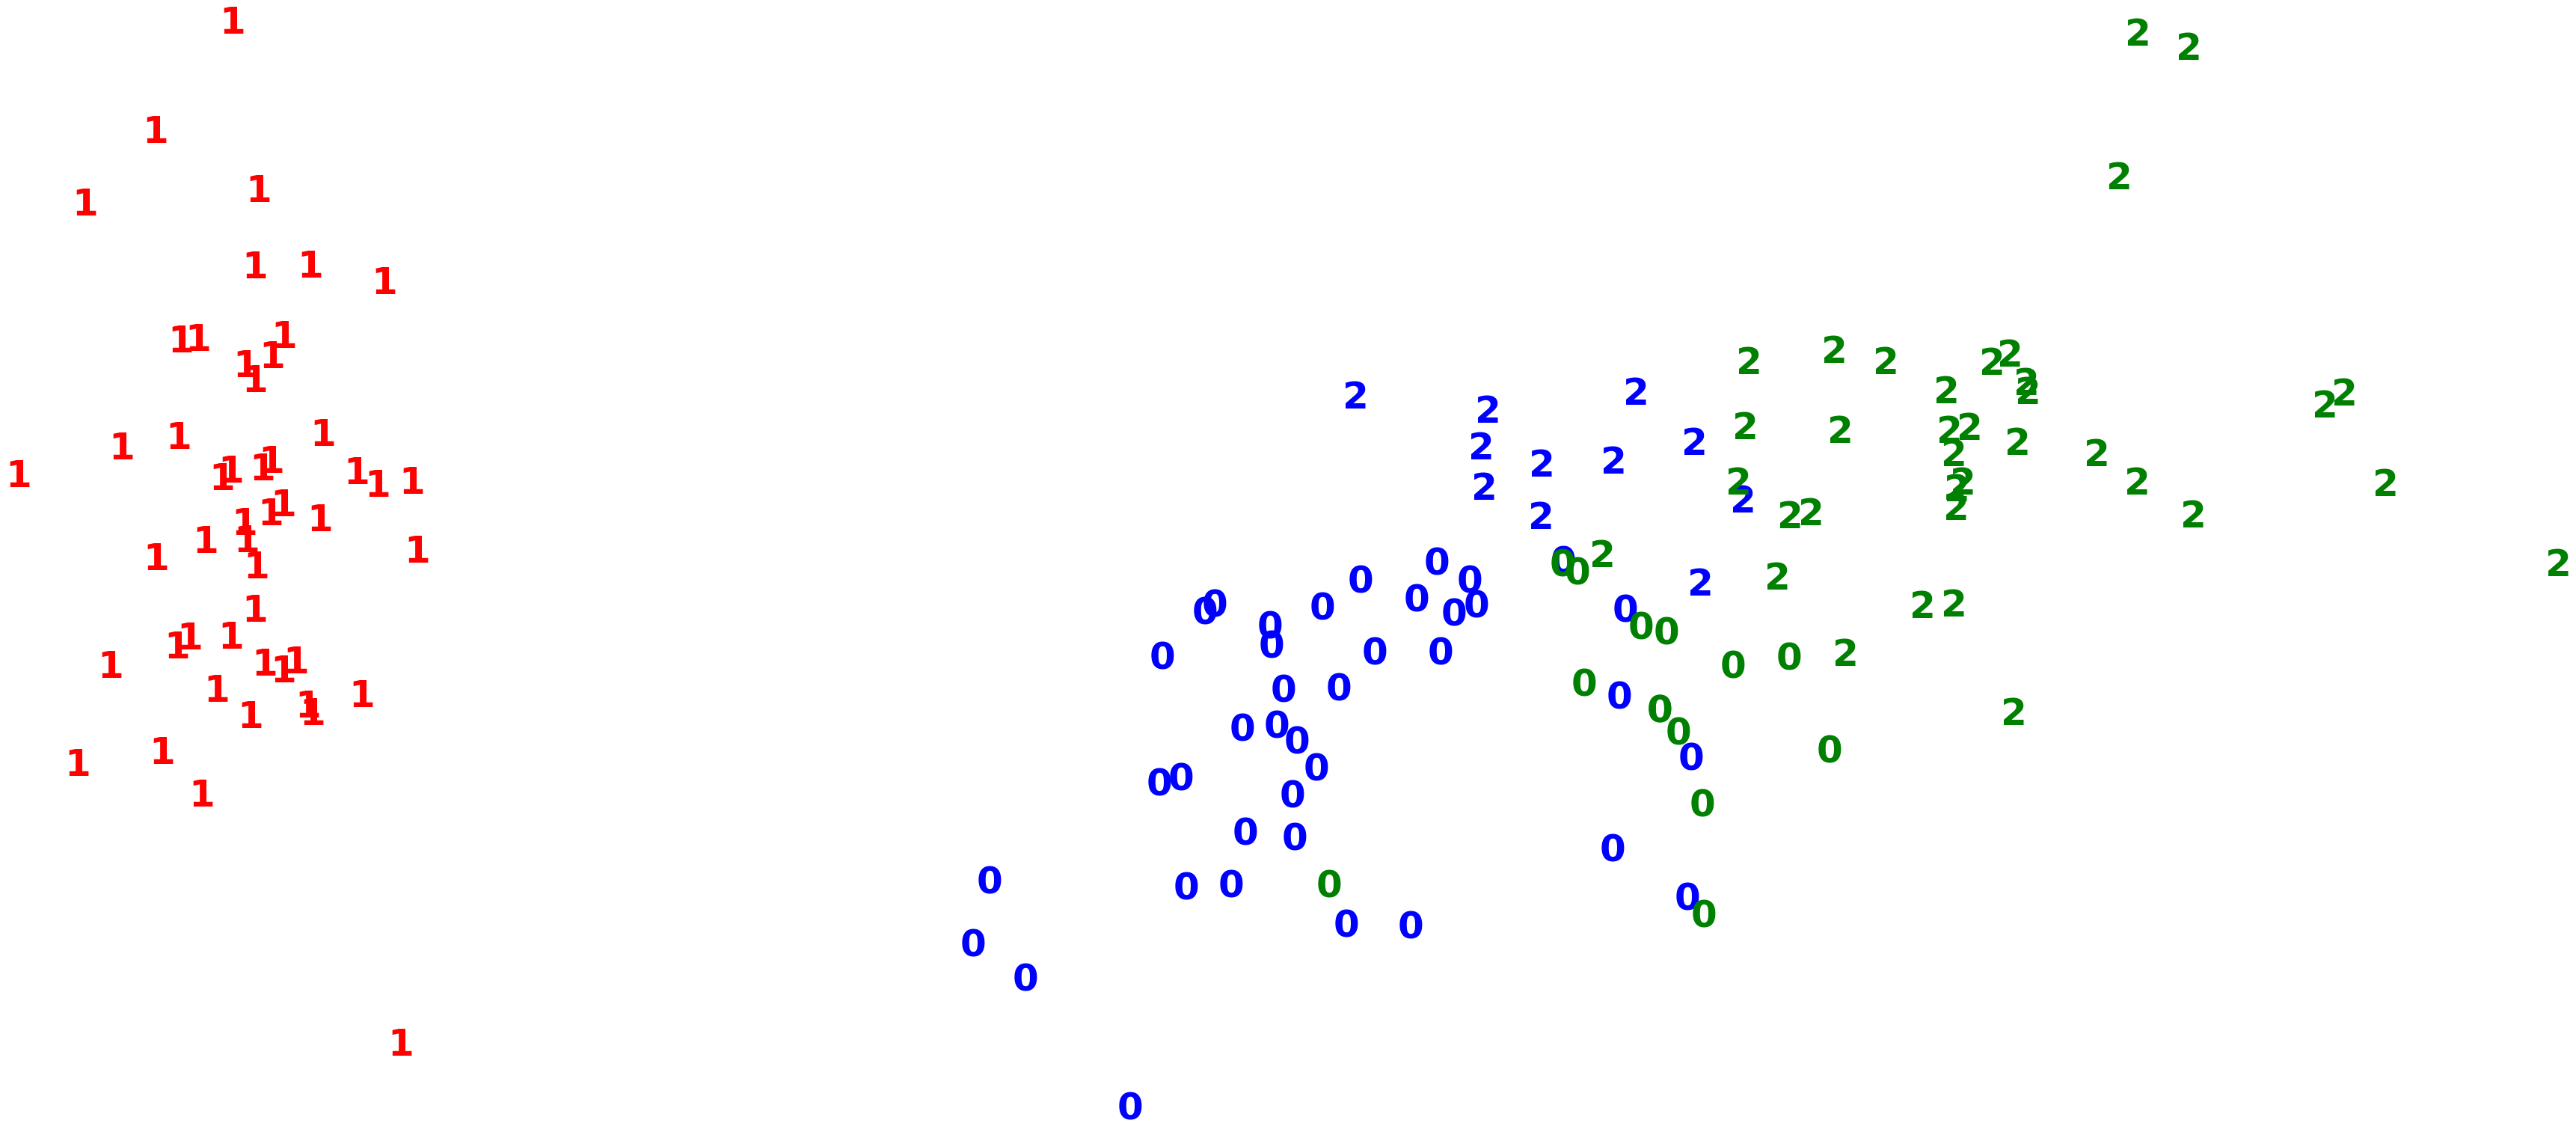

In [3]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

20.3 ms ± 625 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


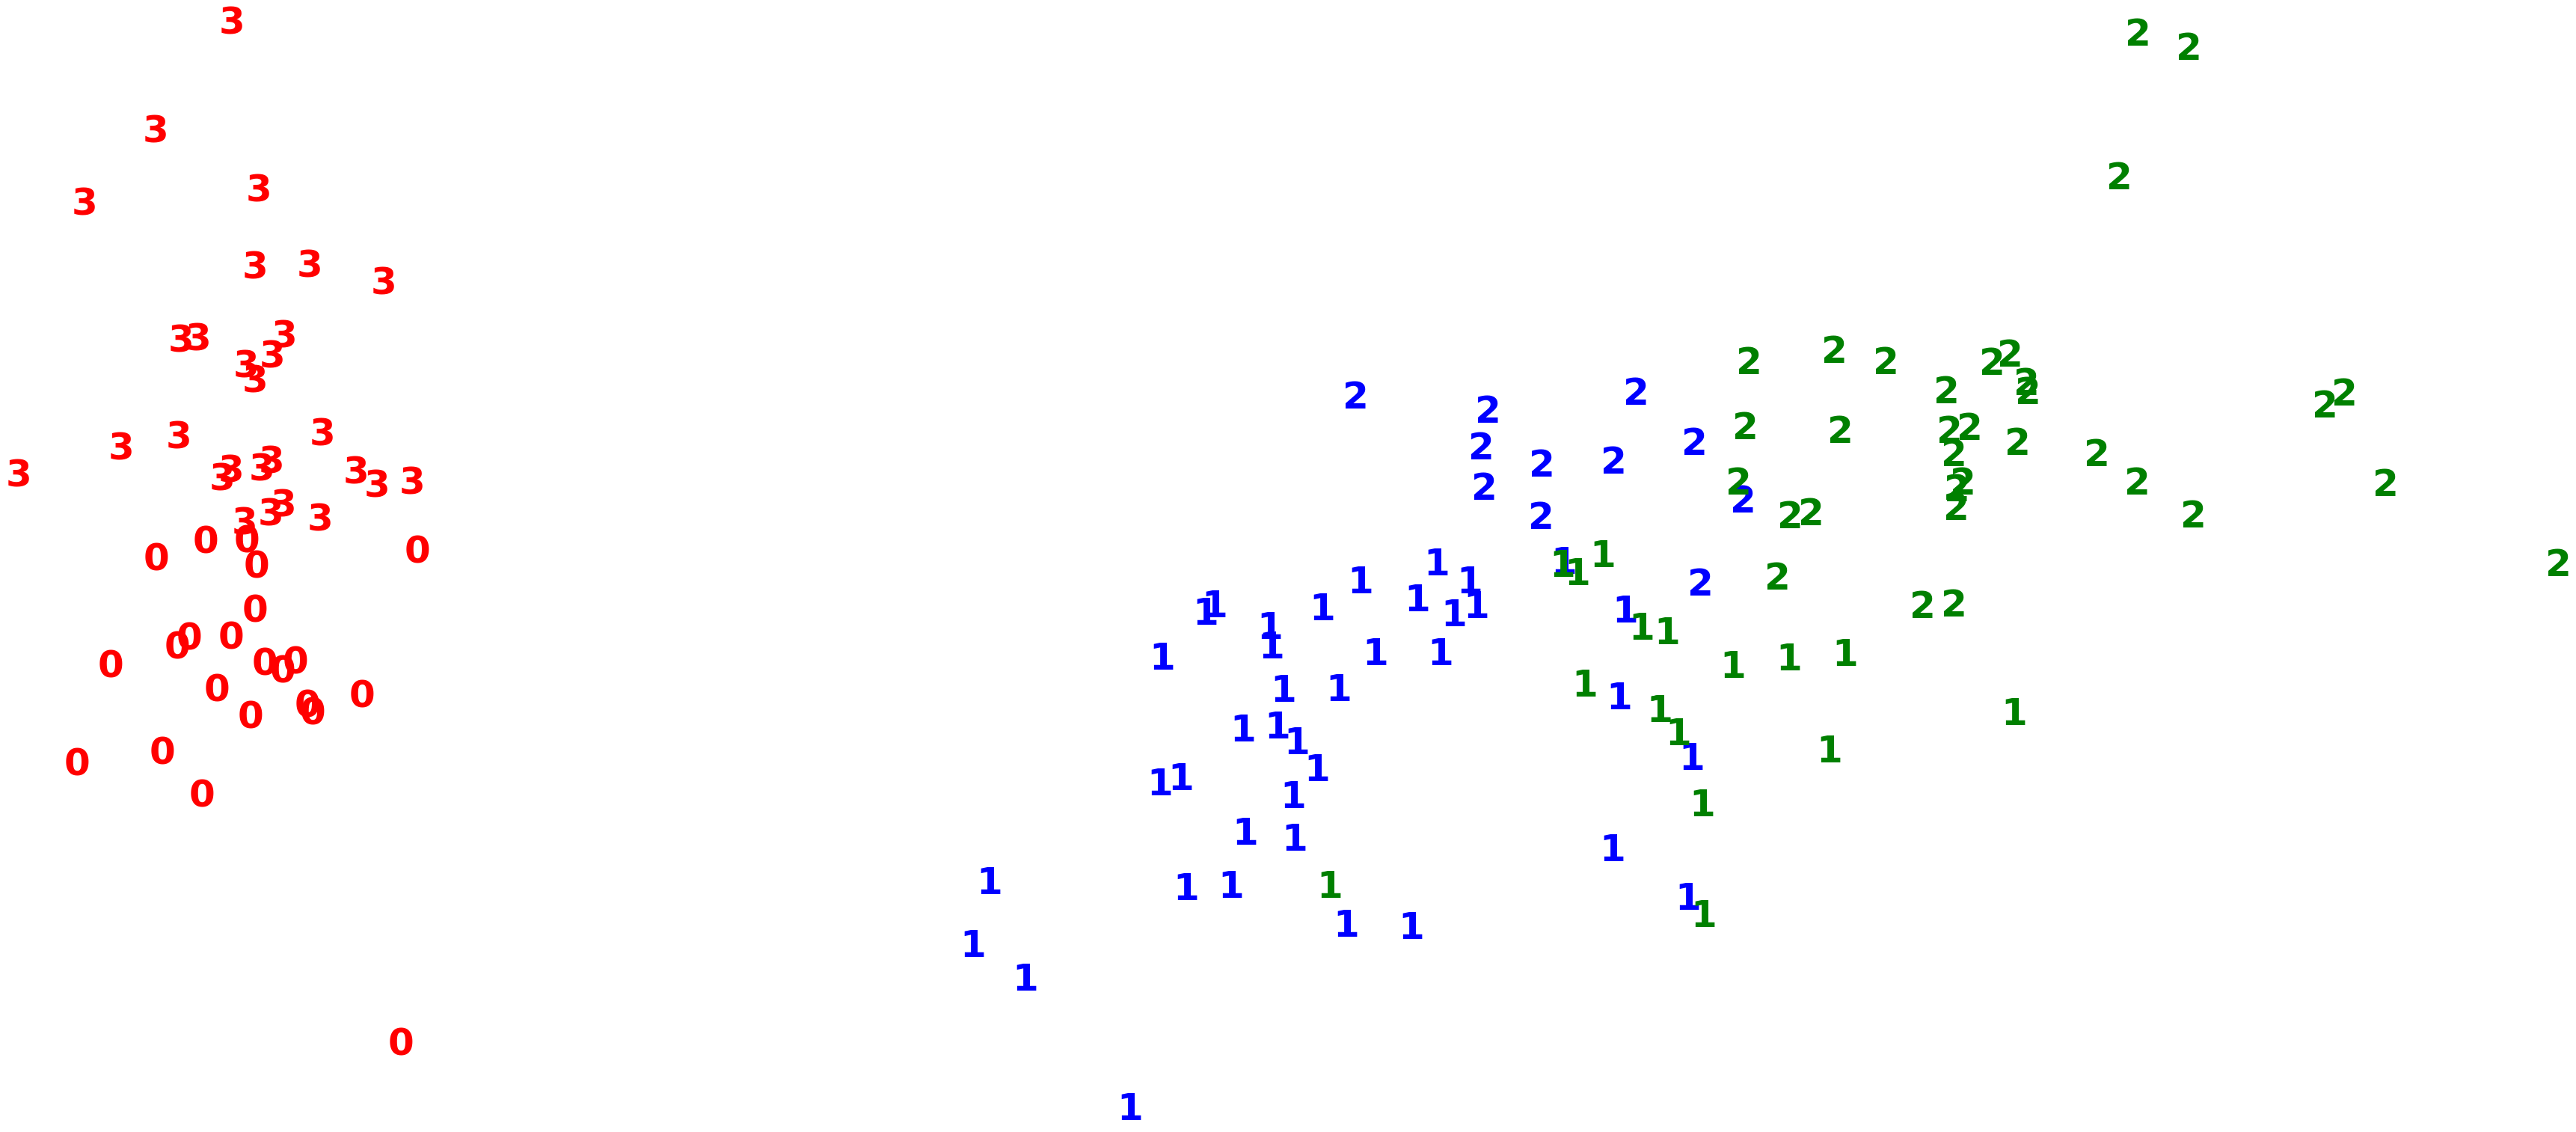

In [4]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

24.4 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


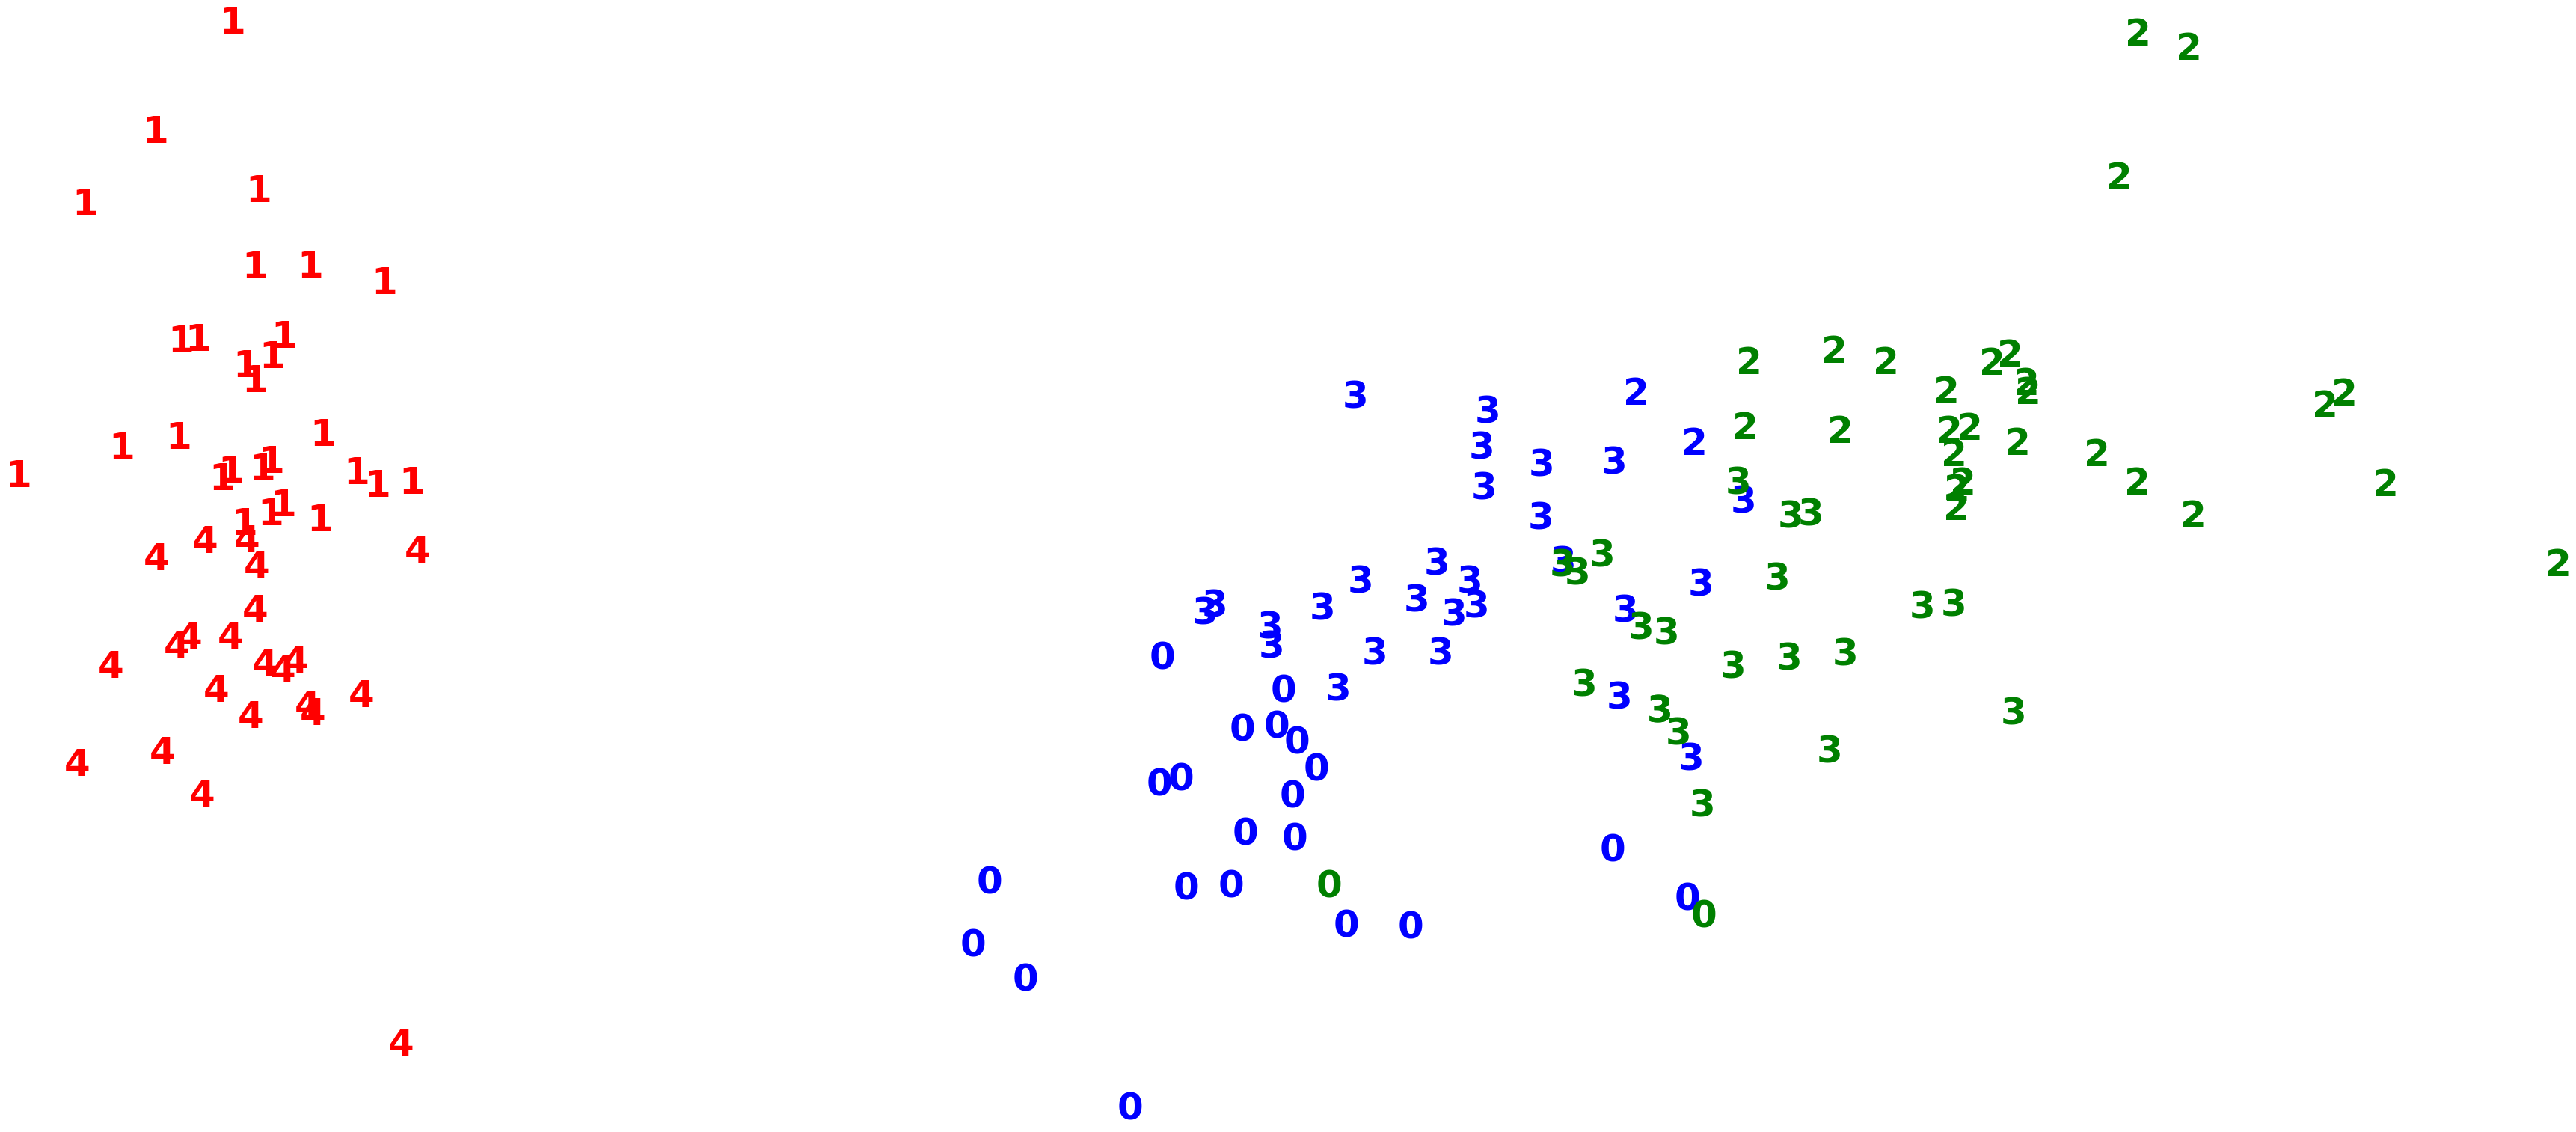

In [5]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Sonuçlara baktığımız zaman 2 kümeye ayırmka gayet başarılı gözüküyor, fakat bir gerçeği bildiğimizden 3 kümelemede oransal olarak yüksek bir başarıya sahip.K değerini arttırdıkça karmaşıklık artıyor.

In this assignment, you work with the heart disease data from the UC Irvine Machine Learning Repository. This dataset contains the records of the patients such that some of them have heart disease and some of them have not. Your task is to create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will not use the information whether the patients have heart disease or not.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
percentage=(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([percentage], axis=1, keys=['Percentage'])
missing_data

,Percentage
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [9]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

33.8 ms ± 3.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


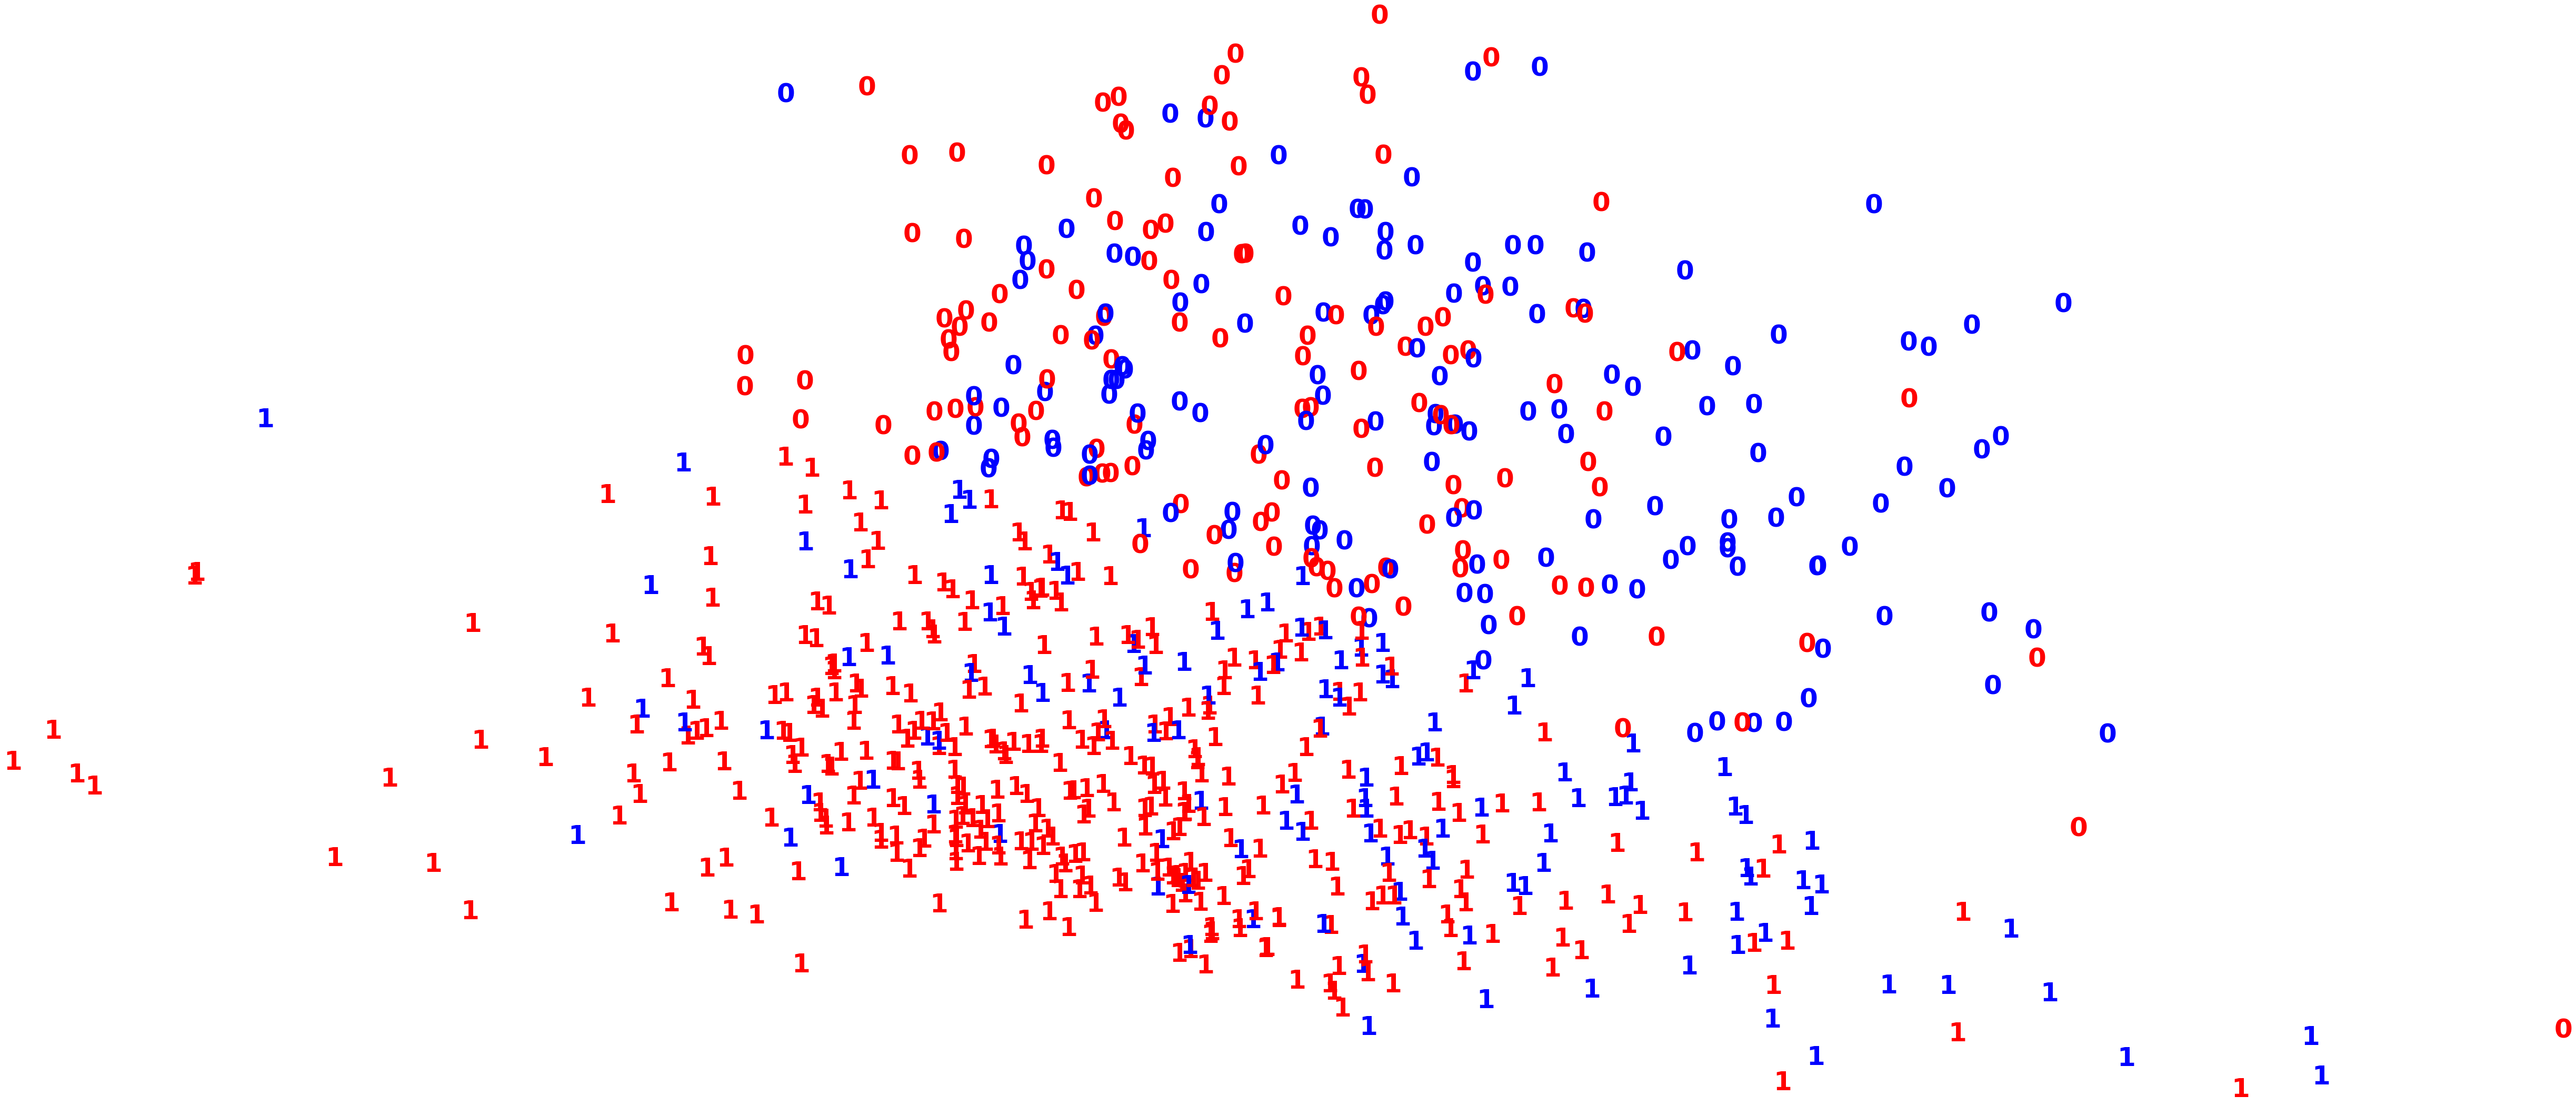

In [10]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(8,6))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix: \n" ,confusion_matrix(df['Outcome'],kmeans_cluster.labels_))

Confusion Matrix: 
 [[127 373]
 [145 123]]
